# Efficient Frontier Project
by: Jean B and Alex G

### Import libraries

In [14]:
import yfinance as yf
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### Step 2: Retrieve daily open or close data on your assets for the previous 2 years

In [15]:
tickers = ["NVDA","META", "COKE", "MSFT", "AAPL", "AMD", "GOOG"] 
#"NVDA", "META", "COKE", "MSFT", "AAPL", "AMD", "GOOG", "SBUX", "F", "TSLA", "BP", "EBAY", "AMZN", "ABNB"
etfs = ["SPY", "IWM", "DIA"]
assets = tickers + etfs

# This should be two years
data = yf.download(tickers, period = '10y')['Adj Close']
dataT = yf.download(tickers, period = '5y')['Adj Close']
""" Using 1 year for testing purpose
Using tickers instead of assets because portfolio only includes tickers"""
returns = data.pct_change().dropna()
returns

[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  7 of 7 completed


,AAPL,AMD,COKE,GOOG,META,MSFT,NVDA
Date,,,,,,,
2013-11-04,0.012922,0.003021,0.000158,-0.000906,-0.030754,0.011540,-0.028833
2013-11-05,-0.002468,0.003012,0.002360,-0.004473,0.039195,0.019477,-0.001350
2013-11-06,-0.002833,-0.003003,-0.007377,0.001204,-0.019757,0.042030,0.006757
2013-11-07,-0.016183,-0.012048,-0.002846,-0.014471,-0.031759,-0.017810,-0.023490
2013-11-08,0.015747,-0.003049,0.019981,0.008016,-0.000631,0.007467,0.069416
...,...,...,...,...,...,...,...
2023-10-26,-0.024606,-0.024880,-0.002898,-0.025499,-0.037325,-0.037514,-0.034778
2023-10-27,0.007969,0.029465,-0.009188,-0.000324,0.029062,0.005856,0.004315
2023-10-30,0.012305,-0.002593,0.010740,0.019044,0.019984,0.022740,0.016321


In [16]:

expected_returns_a = returns # Daily returns from trading day to day...
expected_returns_a.columns = tickers # Setting the Column names 
expected_returns_aA = pd.DataFrame(expected_returns_a.mean()*250) # Annualizing the average rate of return
expected_returns_aA = expected_returns_aA.T # Transpose the values 

dar = data.pct_change().iloc[1:,:]+1 # dar = portfolio returns for each period (in this case day to day)
# 6 is the number of years I am working with (Note: Remember that earlier I've took out a year for training purposes.)
gar = pd.DataFrame(np.prod(dar)**(1/float(6)) - 1) # Geometric Average Rate of Return
# print(gar)
full_return_annual = (pd.concat([expected_returns_aA.T, gar], axis = 1))
# DO NOTE that Arithmetic Average Return is not usually an appropriate method
# for calculating the average return and telling others...

# Example: Returns are the following (50%, 30%, -50%) on a yearly basis (jan 1st to dec 31st)
# Average: (50 + 30 - 50) / 3 = 10% average rate of return. This is not a great "representation of how well you done"
# Example
# Start with initial value of $ 100 Dollars: 
# First year becomes 150. 
# Second Year becomes 190. 
# Third year becomes 97.5. You LOST money.

# Geometric Average: (also known as the Compounded annual growth rate)
# Using the example from above...
# ((1+ 0.5) * (1 + 0.3) * (0.5))^(1/3) - 1
# ((1.5)*(1.3)*(0.5))^(1/3) - 1
# .9916 - 1
# -0.0084
# or (-0.84) % average ANNUAL rate of return (more accurate gauge as to how well you've done.)

full_return_annual.columns = ["Average Arithmetic Returns", "Average Geometric Returns"] 
print("Expected Annual Returns ", expected_returns_aA)

print("dar", dar)

print("Full Annual Return", full_return_annual)

Expected Annual Returns         NVDA      META      COKE      MSFT      AAPL      AMD     GOOG
0  0.274807  0.508216  0.302857  0.197055  0.252058  0.28005  0.57906
dar                 AAPL       AMD      COKE      GOOG      META      MSFT  \
Date                                                                     
2013-11-04  1.012922  1.003021  1.000158  0.999094  0.969246  1.011540   
2013-11-05  0.997532  1.003012  1.002360  0.995527  1.039195  1.019477   
2013-11-06  0.997167  0.996997  0.992623  1.001204  0.980243  1.042030   
2013-11-07  0.983817  0.987952  0.997154  0.985529  0.968241  0.982190   
2013-11-08  1.015747  0.996951  1.019981  1.008016  0.999369  1.007467   
...              ...       ...       ...       ...       ...       ...   
2023-10-26  0.975394  0.975120  0.997102  0.974501  0.962675  0.962486   
2023-10-27  1.007969  1.029465  0.990812  0.999676  1.029062  1.005856   
2023-10-30  1.012305  0.997407  1.010740  1.019044  1.019984  1.022740   
2023-10-31  1.002

### Step 2: Retrieve daily open or close data on your assets for the previous 2 years

In [17]:
data.tail()

,AAPL,AMD,COKE,GOOG,META,MSFT,NVDA
Date,,,,,,,
2023-10-26,166.889999,93.669998,639.960022,123.440002,288.350006,327.890015,403.260010
2023-10-27,168.220001,96.430000,634.080017,123.400002,296.730011,329.809998,405.000000
2023-10-30,170.289993,96.180000,640.890015,125.750000,302.660004,337.309998,411.609985
2023-10-31,170.770004,98.500000,636.409973,125.300003,301.269989,338.109985,407.799988
2023-11-01,171.899994,106.716003,636.809998,126.290001,307.015015,345.140015,419.010010


### Step 3: Calculate the mean, variance, and correlation matrix for all assets

In [18]:
# returns.mean()
# returns.var()

# Mean and Variance
table = pd.DataFrame(index=assets)
table['Mean'] = returns.mean()  # Calculating mean on returns
table['Variance'] = returns.var()  # Calculating variance on returns

table.round(4)  # Displaying the mean and variance table

,Mean,Variance
NVDA,0.0011,0.0003
META,0.0020,0.0013
COKE,0.0012,0.0005
MSFT,0.0008,0.0003
AAPL,0.0010,0.0006
AMD,0.0011,0.0003
GOOG,0.0023,0.0009
SPY,NaN,NaN
IWM,NaN,NaN
DIA,NaN,NaN


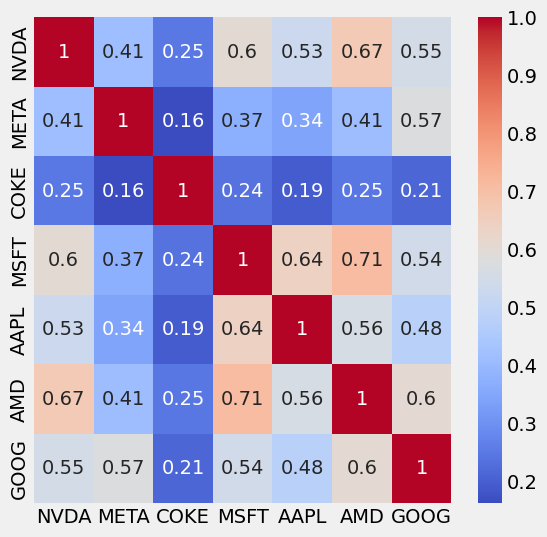

In [19]:
# Correlation matrix
plt.figure(figsize=(6, 6))
sn.heatmap(returns.corr(), annot=True, cmap="coolwarm")

plt.savefig('resources/correlation-matrix.png', dpi=400)

## Source
Monte Carlo Simulation 

https://www.youtube.com/watch?v=wlaLmM_LvWg&ab_channel=SpencerPao

In [20]:
# Setting up empty data frame
portfolio_returns = []
portfolio_volatility = []
sharpe_ratio = []

# This is what is going to be randomized
stock_weights = []

# Number of Indiviudal securities that will be a part of the portfolio
num_assets = len(tickers)
# Number of simulated iterations
num_portfolios = 200000


# Converting daily returns to annual returns
annual_returns = (returns.mean() * 250) + 1  
# Cov of annual
cov_daily = returns.cov()  
cov_annual = cov_daily * 250

# of rows in data = # of trading days
# if the avg return was growth of .001 for 250 days. 
# 250 (.001)= .25 plus 1 is 1.25x return

print(annual_returns)

NVDA    1.274807
META    1.508216
COKE    1.302857
MSFT    1.197055
AAPL    1.252058
AMD     1.280050
GOOG    1.579060
dtype: float64


In [21]:
# Setting seed of interpretability
np.random.seed(3)
# Filling in the lists with a simulated return, risk, and a given weight num_portfolios
for i in range(num_portfolios):
    # Randomly assign weights
    weights = np.random.random(num_assets)
    # Standardize the weights
    weights /= np.sum(weights)
    returns = (np.dot(weights, (annual_returns)))
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    """
    sharpe ratio: This calculates the risk adjusted return
    It suggests that adding assets to a portfolio that have low correlation can decrease portfolio risk without 
    sacrificing return 
    """
    sharpe = ((returns-1) / volatility)
    sharpe_ratio.append(sharpe)
    portfolio_returns.append(returns-1)
    portfolio_volatility.append(volatility)
    stock_weights.append(weights)

In [22]:
# Storing the portfolio values
portfolio = {'Returns': portfolio_returns,
             'Volatility': portfolio_volatility,
             'Sharpe Ratio': sharpe_ratio}

# Add an additional entry to the portfolio such that each indivudal weight is incorporated for its corresponding company
for counter, symbol in enumerate(tickers):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)
df

,Returns,Volatility,Sharpe Ratio,NVDA Weight,META Weight,COKE Weight,MSFT Weight,AAPL Weight,AMD Weight,GOOG Weight
0,0.314129,0.268464,1.170099,0.138548,0.178128,0.073174,0.128494,0.224612,0.225454,0.031590
1,0.322017,0.250730,1.284321,0.098040,0.024347,0.208533,0.014133,0.216113,0.307089,0.131743
2,0.338086,0.284484,1.188416,0.240846,0.210434,0.008541,0.199034,0.092332,0.147837,0.100976
3,0.311784,0.270410,1.153003,0.220482,0.140105,0.049898,0.173248,0.248212,0.097452,0.070603
4,0.332179,0.265642,1.250477,0.076083,0.183629,0.191397,0.131858,0.177050,0.165856,0.074126
...,...,...,...,...,...,...,...,...,...,...
199995,0.365929,0.287520,1.272707,0.132442,0.221676,0.184669,0.102249,0.172662,0.035464,0.150839
199996,0.326827,0.261408,1.250258,0.025490,0.038300,0.199966,0.135853,0.254736,0.171691,0.173964
199997,0.307435,0.251858,1.220666,0.074137,0.014748,0.234319,0.071920,0.284428,0.210099,0.110349
199998,0.341891,0.269657,1.267875,0.055747,0.222455,0.198822,0.198844,0.026043,0.217576,0.080514


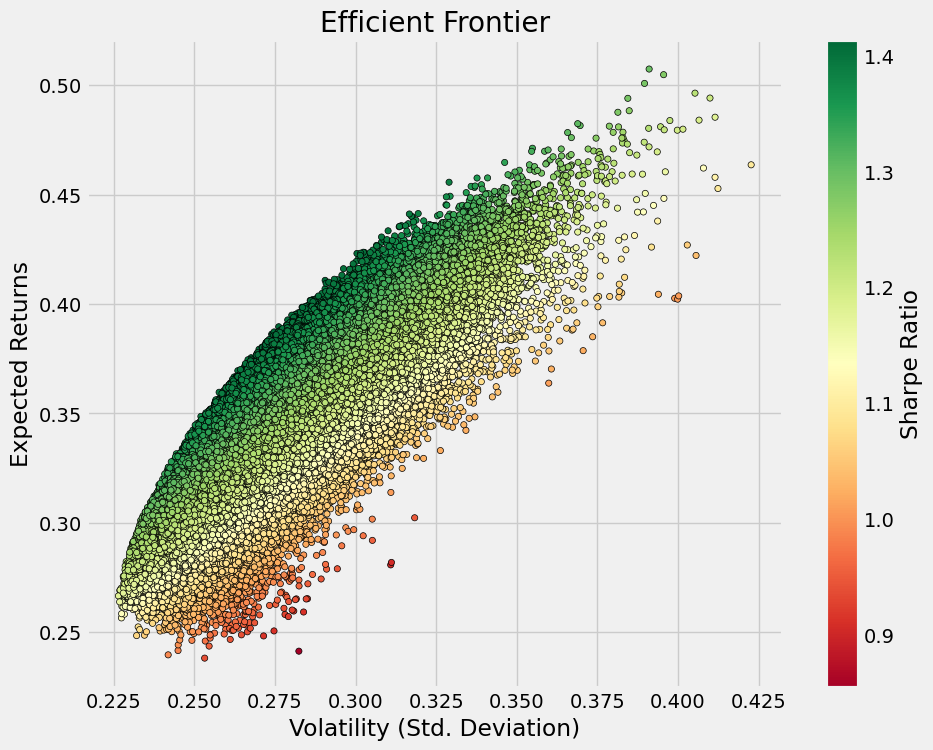

In [23]:
# Plotting the efficient frontier
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

# saving file
filename = 'simple-portfolio-efficient-frontier'
plt.savefig(f'resources/{filename}.png')

plt.show()


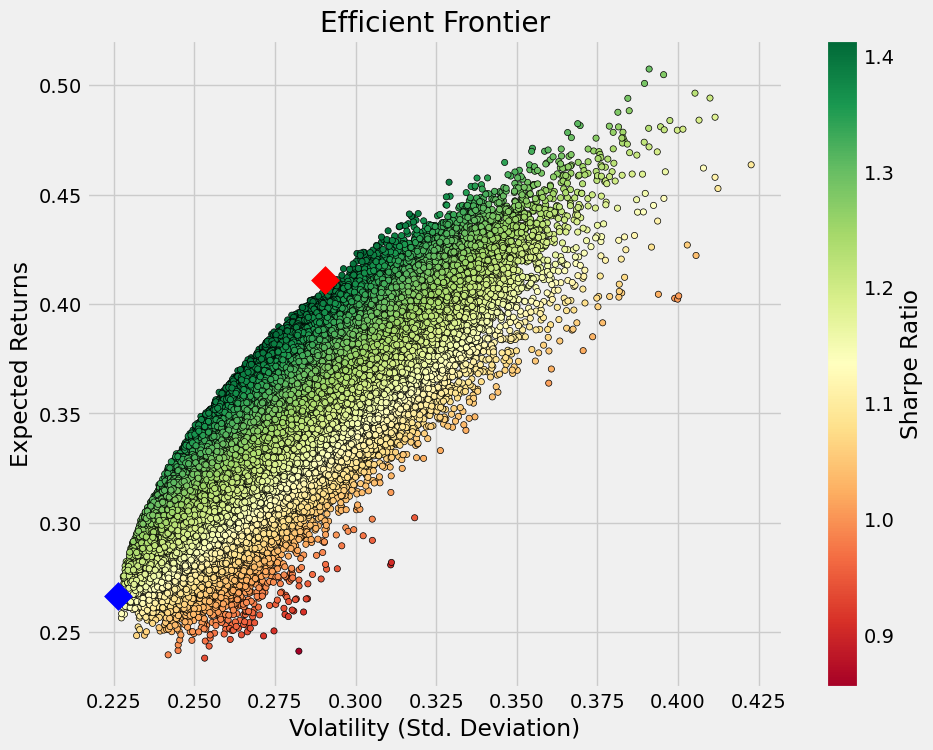

In [24]:
# Finding the Optimal Portfolio
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('fivethirtyeight')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')

# Optimal Portfolio
filename = 'optimal-portfolio-efficient-frontier'
plt.savefig(f'resources/{filename}.png')


# adding linear regression??
#group = (df.round(2)).groupby('Volatility')
#df2 = group.apply(lambda x: x['Volatility'].max())

plt.show()


In [25]:
# Additional Details
r_ef = pd.concat([min_variance_port.T,sharpe_portfolio.T], axis = 1)
r_ef.columns = ["Minimum Risk Adjusted Values", "Max Risk Adjusted Values"]
print(r_ef)

# saving file
filename = 'portfolio-breakdown'
r_ef.to_csv(f'resources/{filename}.csv')


              Minimum Risk Adjusted Values  Max Risk Adjusted Values
Returns                           0.266534                  0.410787
Volatility                        0.226443                  0.290557
Sharpe Ratio                      1.177048                  1.413791
NVDA Weight                       0.227224                  0.077772
META Weight                       0.010753                  0.039759
COKE Weight                       0.210380                  0.280796
MSFT Weight                       0.243476                  0.000370
AAPL Weight                       0.001436                  0.017625
AMD Weight                        0.304485                  0.195085
GOOG Weight                       0.002245                  0.388593


In [26]:
amount_invest = 1000


expected_return = pd.DataFrame(amount_invest * (1+r_ef.iloc[0,:]))
print("----------------------------------------------------------------")
print("                Expected Returns on my Portfolio")
print("----------------------------------------------------------------")
print(expected_return.T)
print("")
print("----------------------------------------------------------------")
print("If I invested", amount_invest,"USD on |", dataT.index[0],"| I would have...")
actual_return = (dataT.iloc[dataT.shape[0]-1,:] - dataT.iloc[0,:]) / ( dataT.iloc[0,:])
# Multipling the weights to the price at the beginning of the year
beg_price = (dataT.iloc[0,:])
end_price = dataT.iloc[dataT.shape[0]-1,:]
print("----------------------------------------------------------------")
# Weights derived from the Efficient Frontier Portfolio
# Weights for Minimum Risk
w = np.array(r_ef.iloc[3:,0])

percentage_change = (end_price - beg_price)/(beg_price)+1
print("Using the Portfolio Weights for Minimum Risk Return Portfolio")
money_left = sum(w * percentage_change* amount_invest)
print("")
print("    Starting balance $ 1000 : Ending with $ ",round(money_left, 2))
print("")
print("----------------------------------------------------------------")
print("Using the Portfolio Weights Maximized Risk-Return Portfolio")
# Weights for Maxmimum Risk
w1 = np.array(r_ef.iloc[3:,1])

money_left1 = sum(w1 * percentage_change* amount_invest)
print("")
print("    Starting balance $ 1000 : Ending with $ ", round(money_left1,2))
print("")

----------------------------------------------------------------
                Expected Returns on my Portfolio
----------------------------------------------------------------
         Minimum Risk Adjusted Values  Max Risk Adjusted Values
Returns                   1266.534046               1410.787156

----------------------------------------------------------------
If I invested 1000 USD on | 2018-11-01 00:00:00 | I would have...
----------------------------------------------------------------
Using the Portfolio Weights for Minimum Risk Return Portfolio

    Starting balance $ 1000 : Ending with $  3224.11

----------------------------------------------------------------
Using the Portfolio Weights Maximized Risk-Return Portfolio

    Starting balance $ 1000 : Ending with $  5236.84



### Step 5: Use MatPlotLib or Seaborn libraries to graph the results (matrix and frontier)

### Step 6: Output the calculated optimal weighting (identify portfolio weightings for optimum Sharpe Ratio) along with the efficient frontier and correlation matrix charts. Output to a saved file.
